In [1]:
# Import the libraries
import pandas as pd 
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the data 
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2019-1-1', end='2020-6-9')

#period: the frequency at which to gather the data; common options would include ‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
#start: the date to start gathering the data. For example ‘2010–1–1’
#end: the date to end gathering the data. For example ‘2020–1–25’

#see your data
tickerDf.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,97.56,99.72,96.96,99.10,35329300,0.0,0
2019-01-03,98.10,98.19,95.26,95.45,42579100,0.0,0
2019-01-04,97.73,100.46,96.95,99.89,44060600,0.0,0
2019-01-07,99.61,101.21,98.96,100.02,35656100,0.0,0


In [3]:
# Assign default name df to tickerDf 
df = tickerDf

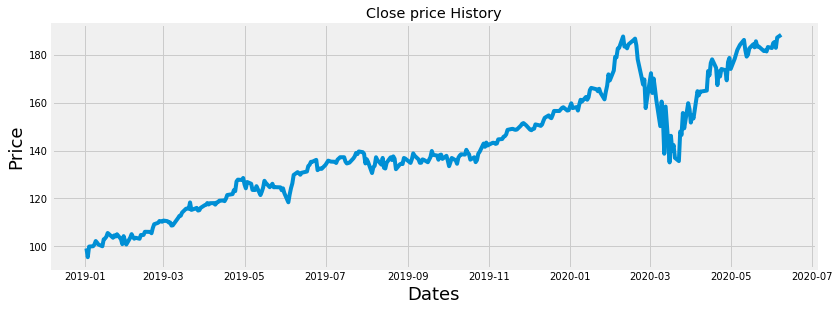

In [4]:
# Visually show thr price
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,df['Close'], label = 'Close Price' )
plt.title('Close price History')
plt.xlabel('Dates',fontsize = 18)
plt.ylabel('Price',fontsize= 18)
plt.show()

In [5]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Close'] = df['Close'].rolling(window=30).mean()
SMA30

,Close
Date,
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
...,...
2020-06-02,179.732667
2020-06-03,180.333000
2020-06-04,180.662333


In [6]:
# Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Close'] = df['Close'].rolling(window=100).mean()

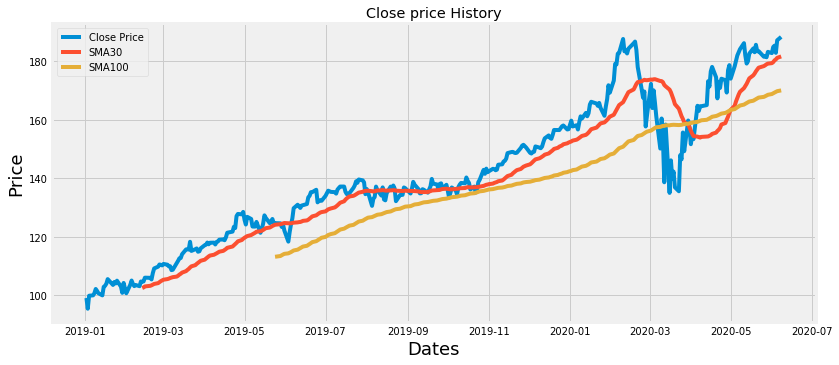

In [7]:
# Visualize the data
plt.figure(figsize=(12.2,5.5))
plt.plot(df.index,df['Close'], label = 'Close Price' )
plt.plot(SMA30['Close'],label = 'SMA30')
plt.plot(SMA100['Close'],label = 'SMA100')
plt.title('Close price History')
plt.xlabel('Dates',fontsize = 18)
plt.ylabel('Price',fontsize= 18)
plt.legend()
plt.show()

In [8]:
# Create a new data frame to store all the data 
data = pd.DataFrame()
data['Close'] = df['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.head(3)

,Close,SMA30,SMA100
Date,,,
2019-01-02,99.10,NaN,NaN
2019-01-03,95.45,NaN,NaN
2019-01-04,99.89,NaN,NaN


In [15]:
# Create a function to signal when to buy and sell assest/stock (18:36)
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

In [16]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [17]:
# Show the data
data

,Close,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2019-01-02,99.10,NaN,NaN,NaN,NaN
2019-01-03,95.45,NaN,NaN,NaN,NaN
2019-01-04,99.89,NaN,NaN,NaN,NaN
2019-01-07,100.02,NaN,NaN,NaN,NaN
2019-01-08,100.75,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-02,184.91,179.732667,169.0907,NaN,NaN
2020-06-03,185.36,180.333000,169.3323,NaN,NaN
2020-06-04,182.92,180.662333,169.5570,NaN,NaN


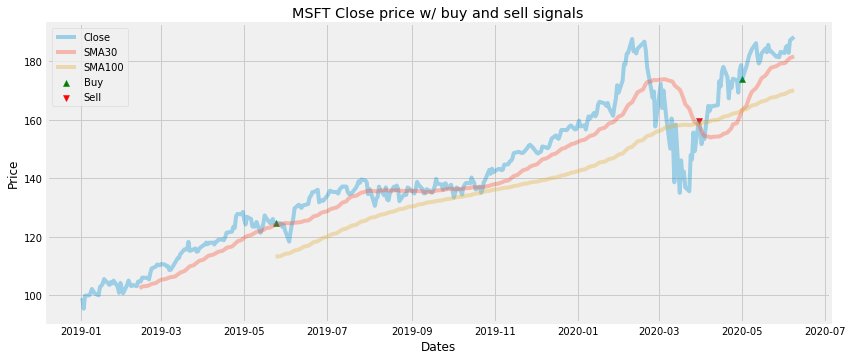

In [18]:
# Visualize the data and strategy to buy and sell
plt.figure(figsize=(12.5,5.5))
plt.plot(data['Close'],label = 'Close',alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30',alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha = 0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label = 'Buy', marker = '^',color = 'green')
plt.scatter(data.index,data['Sell_Signal_Price'],label = 'Sell', marker = 'v',color = 'red')
plt.title('MSFT Close price w/ buy and sell signals')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend()